In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from glob import glob
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

## Gest stats

In [4]:
for file in sorted(glob('../excel_results/*.xlsx')):
    data = pd.read_excel(file,
          sheet_name=[0,1,2,3,4,5,6,7,8,9], engine='openpyxl')
    cnn_accs = []
    gen_accs = []
    combined_accs = []
    auc_cnn = []
    auc_gen = []
    auc_prob = []
    f1_cnn = []
    f1_gen = []
    f1_fusion = []
    for df_name, df in data.items():
        if file == 'data_integration_model_test_probs_RNA-CNV-alphas-XGBOOST.xlsx':
            df = df.loc[(df['Has RNA'] != -1) & (df['Has CNV'] != -1)]
        real = df['Real'].values
        #cnn_preds = df['CNN Pred'].values
        #gen_preds = df['Gen Pred'].values
        combined_preds = df['Integration Pred'].values

        #CNN_prob = [[x,y,z] for x,y,z in zip(df['CNN Prob LUAD'], df['CNN Prob HLT'], df['CNN Prob LUSC'])]
        #gen_prob = [[x,y,z] for x,y,z in zip(df['Gen Prob LUAD'], df['Gen Prob HLT'], df['Gen Prob LUSC'])]
        try:
            fused_prob = [[x,y,z] for x,y,z in zip(df['Intregation Prob LUAD'], df['Integration Prob HLT'], df['Integration Prob LUSC'])]
        except:
            fused_prob = [[x,y,z] for x,y,z in zip(df['Integration Prob LUAD'], df['Integration Prob HLT'], df['Integration Prob LUSC'])]

        #cnn_acc = accuracy_score(real, cnn_preds)
        #gen_acc = accuracy_score(real, gen_preds)
        combined_acc = accuracy_score(real, combined_preds)
        #cnn = roc_auc_score(real, CNN_prob, multi_class='ovr')
        #gen = roc_auc_score(real, gen_prob, multi_class='ovr')
        try:
            fused = roc_auc_score(real, fused_prob, multi_class='ovr')
        except:
            pass

        #print('CM gen')
        #print(confusion_matrix(real, gen_preds))
        #auc_cnn.append(cnn)
        #auc_gen.append(gen)
        auc_prob.append(fused)

        #cnn_accs.append(cnn_acc*100)
    #gen_accs.append(gen_acc*100)
        combined_accs.append(combined_acc*100)
        
        #f1_cnn.append(f1_score(real, cnn_preds, average='weighted')*100)
        #f1_gen.append(f1_score(real, gen_preds, average='weighted')*100)
        f1_fusion.append(f1_score(real, combined_preds, average='weighted')*100)
 
    print('-----------')
    print(file)
    print('-----------')

    #print('CNN ACC: {}+-{}'.format(np.mean(cnn_accs), np.std(cnn_accs)))
    #print('Gen ACC: {}+-{}'.format(np.mean(gen_accs), np.std(gen_accs)))
    print('Fused ACC: {}+-{}'.format(np.mean(combined_accs), np.std(combined_accs)))
    print('\n')
    #print('CNN F1: {} +- {}'.format(np.mean(f1_cnn),np.std(f1_cnn)))
    #print('Gen F1: {} +- {}'.format(np.mean(f1_gen),np.std(f1_gen)))
    print('Fused F1: {} +- {}'.format(np.mean(f1_fusion),np.std(f1_fusion)))
    print('\n')
    #print('CNN AUC: {} +- {}'.format(np.mean(auc_cnn),np.std(auc_cnn)))
    #print('Gen AUC: {} +- {}'.format(np.mean(auc_gen),np.std(auc_gen)))
    print('Fused AUC: {} +- {}'.format(np.mean(auc_prob),np.std(auc_prob)))

-----------
../excel_results/RNA-CNV-Integration-late-fusion-XGBOOST_both.xlsx
-----------
Fused ACC: 94.12915369444595+-1.596105038602268


Fused F1: 94.09252799463825 +- 1.7048343647880915


Fused AUC: 0.9836043361324975 +- 0.005857833610709647
-----------
../excel_results/RNA6_CNV12_early_fusion_test.xlsx
-----------
Fused ACC: 95.02304350330967+-1.3231842755622627


Fused F1: 95.00621374843608 +- 1.3261916548868173


Fused AUC: 0.9845371851589441 +- 0.008606587929515996
-----------
../excel_results/intermediate_fusion_test.xlsx
-----------
Fused ACC: 95.01088218145044+-1.7652479633148048


Fused F1: 95.13146288584102 +- 1.7324914873325021


Fused AUC: 0.9895144172453868 +- 0.007451322162747364


In [87]:
data = pd.read_excel('../excel_results/RNA6_CNV12_early_fusion_test.xlsx',
      sheet_name=[0,1,2,3,4,5,6,7,8,9], engine='openpyxl')
cnn_accs = []
gen_accs = []
combined_accs = []
auc_cnn = []
auc_gen = []
auc_prob = []
f1_cnn = []
f1_gen = []
f1_fusion = []
for df_name, df in data.items():
    #df = df.loc[(df['Has RNA'] != -1) & (df['Has CNV'] != -1)]
    real = df['Real'].values
    cnn_preds = df['RNA Pred'].values
    gen_preds = df['CNV Pred'].values
    combined_preds = df['Integration Pred'].values

    CNN_prob = [[x,y,z] for x,y,z in zip(df['RNA Prob LUAD'], df['RNA Prob HLT'], df['RNA Prob LUSC'])]
    gen_prob = [[x,y,z] for x,y,z in zip(df['CNV Prob LUAD'], df['CNV Prob HLT'], df['CNV Prob LUSC'])]

    try:
        fused_prob = [[x,y,z] for x,y,z in zip(df['Intregation Prob LUAD'], df['Integration Prob HLT'], df['Integration Prob LUSC'])]
    except:
        fused_prob = [[x,y,z] for x,y,z in zip(df['Integration Prob LUAD'], df['Integration Prob HLT'], df['Integration Prob LUSC'])]

    cnn_acc = accuracy_score(real, cnn_preds)
    gen_acc = accuracy_score(real, gen_preds)
    combined_acc = accuracy_score(real, combined_preds)
    try:
        cnn = roc_auc_score(real, CNN_prob, multi_class='ovr')
    except:
        pass
    try:
        gen = roc_auc_score(real, gen_prob, multi_class='ovr')
    except:
        pass
    try:
        fused = roc_auc_score(real, fused_prob, multi_class='ovr')
    except:
        pass

    auc_cnn.append(cnn)
    auc_gen.append(gen)
    auc_prob.append(fused)

    combined_accs.append(combined_acc*100)
    cnn_accs.append(cnn_acc*100)
    gen_accs.append(gen_acc*100)
    f1_cnn.append(f1_score(real, cnn_preds, average='weighted')*100)
    f1_gen.append(f1_score(real, gen_preds, average='weighted')*100)
    f1_fusion.append(f1_score(real, combined_preds, average='weighted')*100)

print('-----------')
print(file)
print('-----------')

print('RNA ACC: {}+-{}'.format(np.mean(cnn_accs), np.std(cnn_accs)))
print('CNV ACC: {}+-{}'.format(np.mean(gen_accs), np.std(gen_accs)))
print('Fused ACC: {}+-{}'.format(np.mean(combined_accs), np.std(combined_accs)))
print('\n')
print('RNA F1: {} +- {}'.format(np.mean(f1_cnn),np.std(f1_cnn)))
print('CNV F1: {} +- {}'.format(np.mean(f1_gen),np.std(f1_gen)))
print('Fused F1: {} +- {}'.format(np.mean(f1_fusion),np.std(f1_fusion)))
print('\n')
print('RNA AUC: {} +- {}'.format(np.mean(auc_cnn),np.std(auc_cnn)))
print('CNV AUC: {} +- {}'.format(np.mean(auc_gen),np.std(auc_gen)))
print('Fused AUC: {} +- {}'.format(np.mean(auc_prob),np.std(auc_prob)))

-----------
intermediate_integration_test.xlsx
-----------
RNA ACC: 94.46132358937881+-1.6687001682216245
CNV ACC: 80.74840589281864+-3.8108039204280098
Fused ACC: 95.02304350330967+-1.3231842755622627


RNA F1: 94.41831523319982 +- 1.6761153247309803
CNV F1: 80.71437331306203 +- 3.8316555732742517
Fused F1: 95.00621374843608 +- 1.3261916548868173


RNA AUC: 0.9789516035762598 +- 0.010327116458552587
CNV AUC: 0.910706397285335 +- 0.01302014956145547
Fused AUC: 0.9845371851589441 +- 0.008606587929515996


## Number of samples

In [67]:
data = pd.read_excel('data_integration_model_test_probs_RNA-CNV-alphas-XGBOOST.xlsx',
            sheet_name=[0], engine='openpyxl')
data_train = pd.read_excel('../two-sources-integration/data_integration_model_train_probs_RNA-CNV-alphas-XGBOOST.xlsx',
            sheet_name=[0], engine='openpyxl')
data = data[0]
data_train = data_train[0]
df_rna = data.loc[data['Has RNA'] != -1]
df_cnv = data.loc[data['Has CNV'] != -1]
df_both = data.loc[(data['Has RNA'] != -1) & (data['Has CNV'] != -1)]

df_rna_train = data_train.loc[data_train['Has RNA'] != -1]
df_cnv_train = data_train.loc[data_train['Has CNV'] != -1]
df_both_train = data_train.loc[(data_train['Has RNA'] != -1) & (data_train['Has CNV'] != -1)]

In [68]:
total_rna = np.concatenate([df_rna['Real'].values, df_rna_train['Real'].values], axis=0)
total_cnv = np.concatenate([df_cnv['Real'].values, df_cnv_train['Real'].values], axis=0)
total_both = np.concatenate([df_both['Real'].values, df_both_train['Real'].values], axis=0)

In [69]:
from collections import Counter
print(Counter(total_rna))
print(Counter(total_cnv))
print(Counter(total_both))

Counter({2: 479, 0: 457, 1: 44})
Counter({1: 919, 2: 472, 0: 465})
Counter({2: 448, 0: 433, 1: 23})


## ROC CURVES

In [97]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import matplotlib
from tqdm.notebook import tqdm
auc_early = []
auc_int = []
auc_late = []
all_real = []
early_probs = []
int_probs = []
late_probs = []
late_real = []
# early integration
for split in tqdm(range(10)):
    data = pd.read_excel('RNA6_CNV12_test.xlsx',
            sheet_name='split_'+str(split), engine='openpyxl')
    fused_prob = [[x,y,z] for x,y,z in zip(data['Intregation Prob LUAD'], data['Integration Prob HLT'], data['Integration Prob LUSC'])]
    fused_prob = np.asarray(fused_prob)
    y = data['Real'].values
    all_real.append(y)
    early_probs.append(fused_prob)

# late integration
for split in tqdm(range(10)):
    data = pd.read_excel('data_integration_model_test_probs_RNA-CNV-alphas-XGBOOST_both.xlsx',
            sheet_name='split_'+str(split), engine='openpyxl')
    data = data.loc[(data['Has RNA'] != -1) & (data['Has CNV'] != -1)]
    y = data['Real'].values
    late_real.append(y)
    fused_prob = [[x,y,z] for x,y,z in zip(data['Integration Prob LUAD'], data['Integration Prob HLT'], data['Integration Prob LUSC'])]
    fused_prob = np.asarray(fused_prob)
    late_probs.append(fused_prob)

# intermediate integration
for split in tqdm(range(10)):
    data = pd.read_excel('intermediate_integration_test.xlsx',
            sheet_name='split_'+str(split), engine='openpyxl')
    fused_prob = [[x,y,z] for x,y,z in zip(data['Intregation Prob LUAD'], data['Integration Prob HLT'], data['Integration Prob LUSC'])]
    fused_prob = np.asarray(fused_prob)
    int_probs.append(fused_prob)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


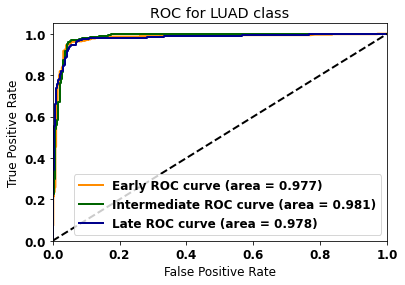

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


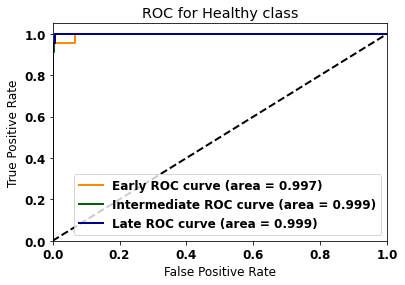

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


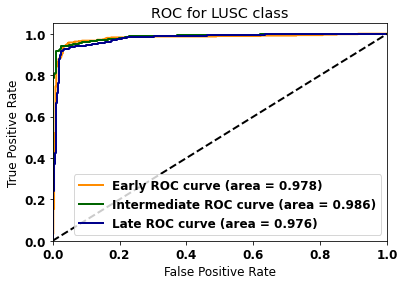

In [98]:

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


all_real = np.concatenate(all_real)
late_real = np.concatenate(late_real)
n_values = np.max(all_real) + 1
y_hot = np.eye(n_values)[all_real]
n_values = np.max(all_real) + 1
y_hot_late = np.eye(n_values)[late_real]

early_probs = np.concatenate(early_probs)
late_probs = np.concatenate(late_probs)
int_probs = np.concatenate(int_probs)

# Compute ROC curve and ROC area for each class
fpr_early = dict()
tpr_early = dict()
roc_auc_early = dict()
for i in range(3):
    fpr_early[i], tpr_early[i], _ = roc_curve(y_hot[:, i], early_probs[:, i])
    roc_auc_early[i] = auc(fpr_early[i], tpr_early[i])

fpr_late = dict()
tpr_late = dict()
roc_auc_late = dict()
for i in range(3):
    fpr_late[i], tpr_late[i], _ = roc_curve(y_hot_late[:, i], late_probs[:, i])
    roc_auc_late[i] = auc(fpr_late[i], tpr_late[i])

fpr_int = dict()
tpr_int = dict()
roc_auc_int = dict()
for i in range(3):
    fpr_int[i], tpr_int[i], _ = roc_curve(y_hot[:, i], int_probs[:, i])
    roc_auc_int[i] = auc(fpr_int[i], tpr_int[i])



plt.figure()
lw = 2
plt.plot(fpr_early[0], tpr_early[0], color='darkorange',
lw=lw, label='Early ROC curve (area = %0.3f)' % roc_auc_early[0])
plt.plot(fpr_int[0], tpr_int[0], color='darkgreen',
lw=lw, label='Intermediate ROC curve (area = %0.3f)' % roc_auc_int[0])
plt.plot(fpr_late[0], tpr_late[0], color='darkblue',
lw=lw, label='Late ROC curve (area = %0.3f)' % roc_auc_late[0])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LUAD class')
plt.legend(loc="lower right")
plt.savefig('test_auc_LUAD.eps', dpi=300, format='eps')
plt.show()
plt.close()

plt.figure()
lw = 2
plt.plot(fpr_early[1], tpr_early[1], color='darkorange',
lw=lw, label='Early ROC curve (area = %0.3f)' % roc_auc_early[1])
plt.plot(fpr_int[1], tpr_int[1], color='darkgreen',
lw=lw, label='Intermediate ROC curve (area = %0.3f)' % roc_auc_int[1])
plt.plot(fpr_late[1], tpr_late[1], color='darkblue',
lw=lw, label='Late ROC curve (area = %0.3f)' % roc_auc_late[1])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Healthy class')
plt.legend(loc="lower right")
plt.savefig('test_auc_HLT.eps', dpi=300, format='eps')
plt.show()
plt.close()

plt.figure()
lw = 2
plt.plot(fpr_early[2], tpr_early[2], color='darkorange',
lw=lw, label='Early ROC curve (area = %0.3f)' % roc_auc_early[2])
plt.plot(fpr_int[2], tpr_int[2], color='darkgreen',
lw=lw, label='Intermediate ROC curve (area = %0.3f)' % roc_auc_int[2])
plt.plot(fpr_late[2], tpr_late[2], color='darkblue',
lw=lw, label='Late ROC curve (area = %0.3f)' % roc_auc_late[2])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LUSC class')
plt.legend(loc="lower right")
plt.savefig('test_auc_LUSC.eps', dpi=300, format='eps')
plt.show()
plt.close()

## CONFUSION MATRIX

In [99]:
early_real = []
int_real = []
late_real = []
early_preds = []
int_preds = []
late_preds = []

# early integration
for split in tqdm(range(10)):
    data = pd.read_excel('RNA6_CNV12_test.xlsx',
            sheet_name='split_'+str(split), engine='openpyxl')
    y = data['Real'].values
    early_real.append(y)
    early_preds.append(data['Integration Pred'].values)

# late integration
for split in tqdm(range(10)):
    data = pd.read_excel('data_integration_model_test_probs_RNA-CNV-alphas-XGBOOST_both.xlsx',
            sheet_name='split_'+str(split), engine='openpyxl')
    data = data.loc[(data['Has RNA'] != -1) & (data['Has CNV'] != -1)]
    y = data['Real'].values
    late_real.append(y)
    late_preds.append(data['Integration Pred'].values)

# intermediate integration
for split in tqdm(range(10)):
    data = pd.read_excel('intermediate_integration_test.xlsx',
            sheet_name='split_'+str(split), engine='openpyxl')
    y = data['Real'].values
    int_real.append(y)
    int_preds.append(data['Integration Pred'].values)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [100]:
import itertools

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
def plot_cm(real_labels, preds, title, save_name):
    cm = confusion_matrix(real_labels, preds)

    cmap = None
    target_names = ['LUAD', 'Healthy', 'LUSC']
    normalize = False

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm_cnn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.savefig(save_name, dpi=300, bbox_inches = "tight", format='eps')
    plt.show()

In [101]:
early_real = np.concatenate(early_real)
late_real = np.concatenate(late_real)
int_real = np.concatenate(int_real)

early_preds = np.concatenate(early_preds)
late_preds = np.concatenate(late_preds)
int_preds = np.concatenate(int_preds)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


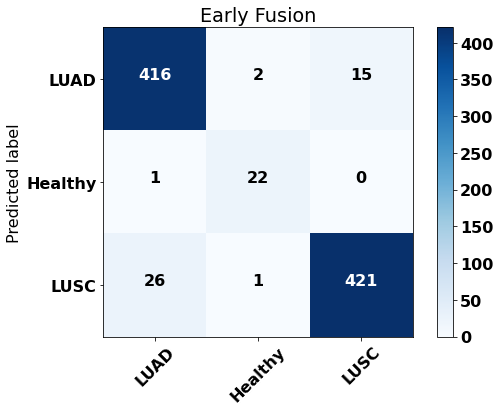

In [91]:
plot_cm(early_real, early_preds, title='Early Fusion', save_name='early_fusion_cm.eps')

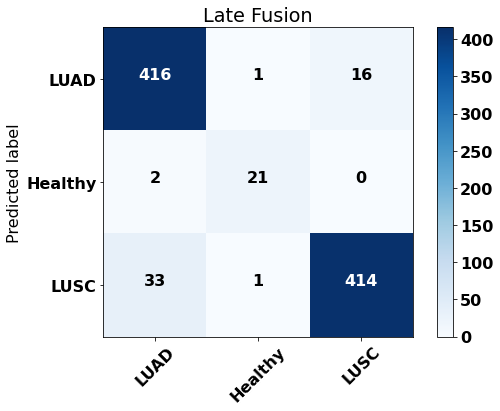

In [102]:
plot_cm(late_real, late_preds, title='Late Fusion', save_name='late_fusion_cm.eps')

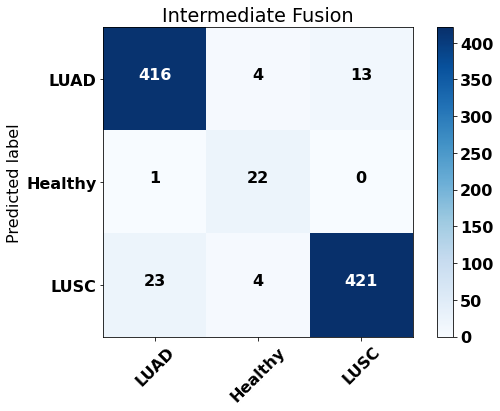

In [93]:
plot_cm(int_real, int_preds, title='Intermediate Fusion', save_name='intermediate_fusion_cm.eps')